Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📊 Statistical Summary:


,Configuration,Download_Mbps_mean,Download_Mbps_median,Download_Mbps_std,Upload_Mbps_mean,Upload_Mbps_median,Upload_Mbps_std,Latency_ms_mean,Latency_ms_median,Latency_ms_std
0,Baseline,74.25,74.1,1.10,18.61,18.6,0.30,6.77,6.8,0.30
1,VPN Only,69.69,69.9,1.04,17.27,17.2,0.40,26.93,26.3,2.39
2,VPN - Tor,21.37,21.8,1.69,13.39,13.6,0.83,170.76,138.7,69.00
3,VPN - Tor - VPN,21.64,22.0,1.22,13.37,13.6,0.67,195.33,136.0,97.53


<ipython-input-10-bf9aa0972ddc>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Configuration", y="Latency_ms", palette="Set2")


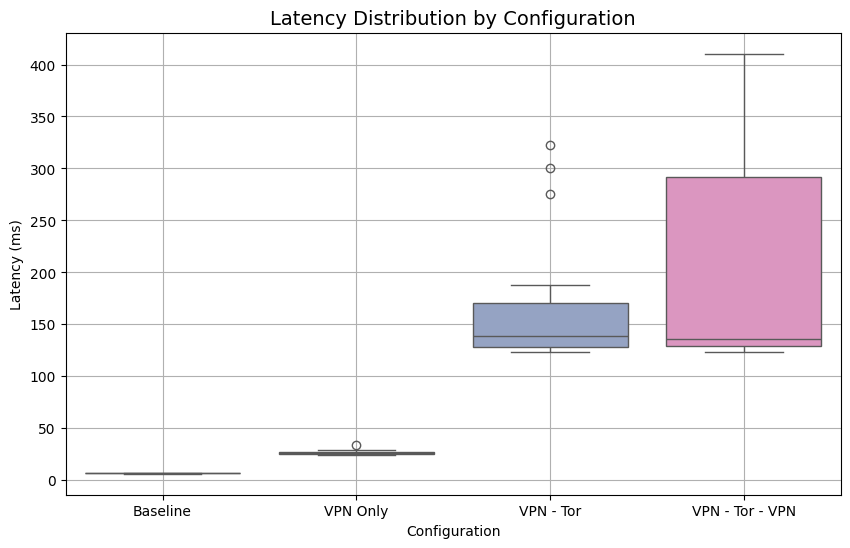

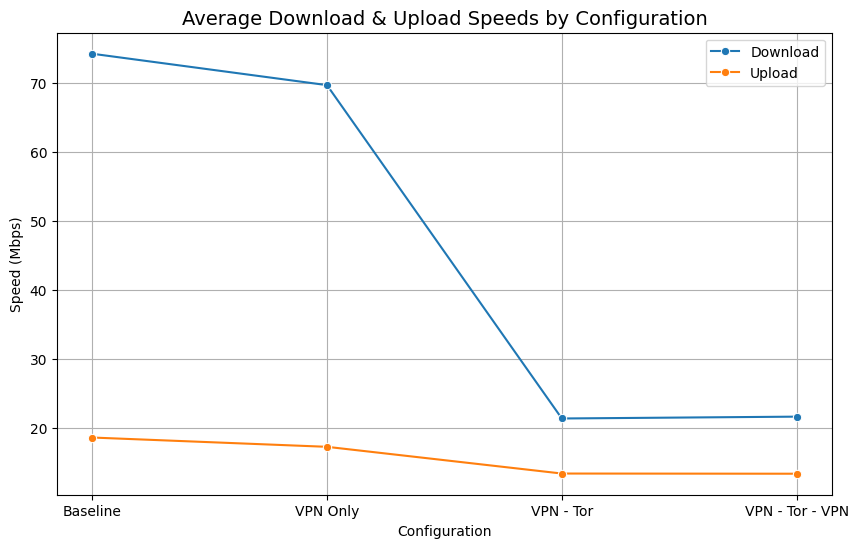

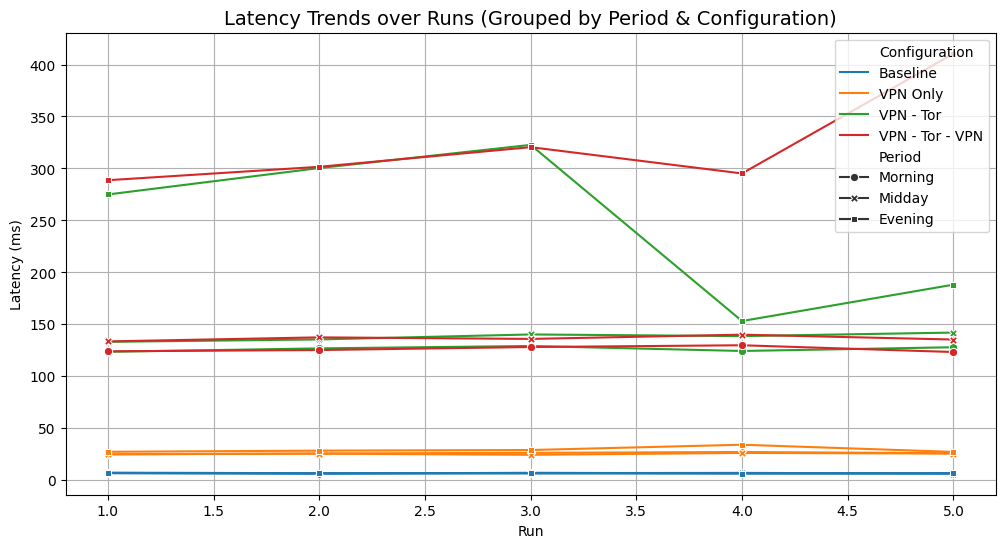

In [ ]:
# STEP 1: Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so  # Optional, future use
import numpy as np

from google.colab import drive

# STEP 2: Mount Google Drive
drive.mount('/content/drive')

# STEP 3: Load CSV
csv_path = "/content/drive/MyDrive/FYP/iperf_FYP_measurements.csv"
df = pd.read_csv(csv_path)

ordered_configs = ["Baseline", "VPN Only", "VPN - Tor", "VPN - Tor - VPN"]
df["Configuration"] = pd.Categorical(df["Configuration"], categories=ordered_configs, ordered=True)

# Optional: Preview
df.head()

# Ensure correct column types
df["Run"] = df["Run"].astype(int)
df["Download_Mbps"] = pd.to_numeric(df["Download_Mbps"], errors="coerce")
df["Upload_Mbps"] = pd.to_numeric(df["Upload_Mbps"], errors="coerce")
df["Latency_ms"] = pd.to_numeric(df["Latency_ms"], errors="coerce")

# STEP 4: Statistical Summary Table
summary = df.groupby("Configuration", observed=False).agg({
    'Download_Mbps': ['mean', 'median', 'std'],
    'Upload_Mbps': ['mean', 'median', 'std'],
    'Latency_ms': ['mean', 'median', 'std']
}).round(2)

summary.columns = ['_'.join(col) for col in summary.columns]
summary.reset_index(inplace=True)

print("📊 Statistical Summary:")
display(summary)

# STEP 5: Boxplot – Latency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Configuration", y="Latency_ms", palette="Set2")
plt.title("Latency Distribution by Configuration", fontsize=14)
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.show()

# STEP 6: Line Plot – Average Download & Upload Speeds
avg_speeds = df.groupby("Configuration", observed=True)[["Download_Mbps", "Upload_Mbps"]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_speeds, x="Configuration", y="Download_Mbps", label="Download", marker="o")
sns.lineplot(data=avg_speeds, x="Configuration", y="Upload_Mbps", label="Upload", marker="o")
plt.title("Average Download & Upload Speeds by Configuration", fontsize=14)
plt.ylabel("Speed (Mbps)")
plt.grid(True)
plt.show()

# STEP 7: Latency Trends per Period & Configuration
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Run", y="Latency_ms", hue="Configuration", style="Period", markers=True, dashes=False)
plt.title("Latency Trends over Runs (Grouped by Period & Configuration)", fontsize=14)
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.show()
